**Preprocessing the Dataset:**

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv("penguins.csv")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Encoding categorical variable 'sex'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

# Selecting features for clustering
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]


   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


**Applying KMeans Algorithm and Plotting Elbow Graph:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

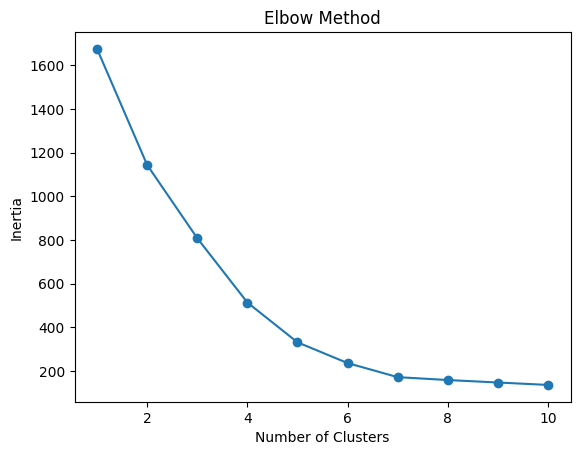

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()




From the Elbow graph, we can see that the optimal number of clusters is where the inertia starts to decrease at a slower rate.
Let's choose the number of clusters accordingly and fit the KMeans algorithm.

In [19]:
k = 4  # Optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Plotting Points and Clusters:**

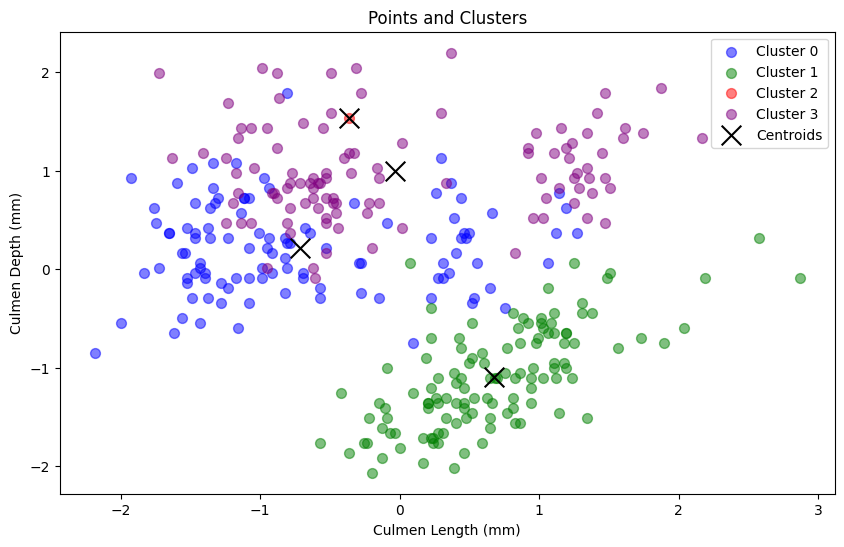

In [22]:
# Plotting points and clusters with unique colors for each cluster
plt.figure(figsize=(10, 6))

# Define unique colors for each cluster
colors = ['blue', 'green', 'red', 'purple']

# Plotting points with unique colors
for i in range(k):
    plt.scatter(X_scaled[df['cluster'] == i][:, 0], X_scaled[df['cluster'] == i][:, 1], c=colors[i], label=f'Cluster {i}', s=50, alpha=0.5)

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, label='Centroids')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Points and Clusters')
plt.legend()
plt.show()

**Generating Detailed Report:**

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['cluster'], test_size=0.2, random_state=42)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, kmeans.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, kmeans.predict(X_test))
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, kmeans.predict(X_test))
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[27  0  0  0]
 [ 0 20  0  0]
 [ 0  0  1  0]
 [ 0  0  0 19]]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        19

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

